>**Developer:** Mukesh Kumar

>**Email:** coldperformer@gmail.com

>**LinkedIn:** https://www.linkedin.com/in/mk09/

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing & Upgrading Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-processing**](#Section5)<br>
**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Text Vectorizing - TFIDF**](#Section71)<br>
  - **7.2** [**Data Splitting**](#Section72)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Logistic Regression**](#Section81)<br>
  - **8.2** [**Multinomial Naive Bayes**](#Section82)<br>
  - **8.3** [**New Predictions**](#Section83)<br>

**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Sentiment Analysis refers to contextual mining of text which identifies and extracts subjective information in source material.

- It helps a business to understand the social sentiment of their brand, product or service while monitoring online conversations.

- With the recent advances in deep learning, the ability of algorithms to analyse text has improved considerably. 

- Creative use of advanced artificial intelligence techniques can be an effective tool for doing in-depth research.

- It is extremely important to classify incoming customer conversation about a brand based on following lines:

    - Key aspects of a brand’s product and service that customers care about.
    
    - Users’ underlying intentions and reactions concerning those aspects.

- There is also a playground available to test out the sentiment of the text by <a href="https://komprehend.io/">Komprehend</a>.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Sentiment Analysis works by analyzing an incoming message and tells whether the underlying sentiment is positive, negative, or neutral.

- The applications of sentiment analysis are endless. Let’s jump into a real-world example of how people show their sentiment on movies present on IMDB. 

<center><img src="https://d3caycb064h6u1.cloudfront.net/wp-content/uploads/2021/06/sentimentanalysishotelgeneric-2048x803-1.jpg"></center>

**<h4>Scenario (Hypothetical):</h4>**

- **Ronzaro**, is a British American company that **buys and sells first hand copy of movies**.

- They **initiated** their business in **late 90s** and have gain pretty good popularity over the years.

- Company has started **facing loss** in business due to the evolvement in the area.

- There are **several competitors in the market** who have been using enhanced techniques.

- As the company is pretty old, they are **failing to analyze customers behaviour** towards their services.

- They are **looking for a more robust way** to **understand** the **customer's** sentiment.

- Recently they get to know about **data scientists** who helps businesses to sort out such issues.

- They **decided to hire a team of data scientist**. Consider you are one of them…

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [ ]:
!pip install -q --upgrade wordcloud
!pip install -q --upgrade PyAudio
!pip install -q --upgrade pyttsx3
!pip install -q --upgrade SpeechRecognition

<a name = Section32></a>
### **3.2 Importing Libraries**

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import re                                                           # To perform regular expression based operations
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from wordcloud import WordCloud                                     # To generate wordcloud from the text documents
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import pyttsx3                                                      # Text to speech conversion library
import pyaudio                                                      # Cross-platform audio input/output stream library
import speech_recognition as sr                                     # For performing speech recognition operations
import wave                                                         # The audio file format of WAV
#-------------------------------------------------------------------------------------------------------------------------------
import nltk                                                         # Toolkit to peform natural language processing
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords                                   # Stopwords corpus
from nltk.stem import WordNetLemmatizer                             # To perform word lemmatization operations
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer         # To transform text data to vector form
from sklearn.naive_bayes import MultinomialNB                       # To develop multionmial naive bayse classfier
from sklearn.linear_model import LogisticRegression                 # To develop logistic regression classfier
from sklearn.model_selection import train_test_split                # To split data into training and testing part
from sklearn.metrics import classification_report                   # To check model performance using a report
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coldp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\coldp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The data set is based on the sentiment of movie reviews present on IMDB provided by Ronzaro.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 50000 | 2 | 63.1 MB | 


| Id | Features | Description |
| :-- | :-- | :-- |
|01|**review**|Review of the movie.|
|02|**sentiment**|Sentiment concerning the movie.|

In [3]:
data = pd.read_csv(filepath_or_buffer='https://gitlab.com/coldperformer/multimedia/-/raw/main/machine-learning-projects/data/04-imdb-movies-reviews.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (50000, 2)


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

---
<a name = Section5></a>
# **5. Data Pre-processing**
---

<a name = Section51></a>
### **Identification and Handling of Missing Values**

In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

<a name = Section52></a>
### **Identification and Handling of Duplicate Values**

In [5]:
data.duplicated().sum()

418

In [6]:
print('Old Data Shape:', data.shape)
data.drop_duplicates(inplace=True)
print('Duplicate data rows dropped!')
print('New Data Shape:', data.shape)

Old Data Shape: (50000, 2)
Duplicate data rows dropped!
New Data Shape: (49582, 2)


In [7]:
data.duplicated().sum()

0

<a name = Section53></a>
### **Text Cleaning**

In [8]:
stop_words = stopwords.words('english')
stop_words.append('movie')

def clean_data(text):
    """Cleans text data containing punctuation, stopwords, emoticons, stems, and lemmas."""

    # Removing punctuation, stopwords, and emoticons
    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[0-9]', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) +' '.join(emoticons).replace('-', ''))
    rm_words = [w for w in text.split() if w.lower() not in stop_words]

    # Performing Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(word) for word in rm_words]
    
    return ' '.join(lemma_words)

clean_data('hello john!-;/.,<>? how are you.. @#$%^&*I am fine movie:')

'hello john fine'

In [9]:
data['review'] = data['review'].apply(clean_data)
data.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side,positive
1,wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done,positive
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many u grown love laughed one woody comedy year dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wear prada interesting superman great comedy go see friend,positive
3,basically family little boy jake think zombie closet parent fighting time slower soap opera suddenly jake decides become rambo kill zombie ok first going make film must decide thriller drama drama watchable parent divorcing arguing like real life jake closet totally ruin film expected see boogeyman similar instead watched drama meaningless thriller spot well playing parent descent dialog shot jake ignore,negative
4,petter mattei love time money visually stunning film watch mr mattei offer u vivid portrait human relation seems telling u money power success people different situation encounter variation arthur schnitzler play theme director transfer action present time new york different character meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one get soul picture different stage loneliness one inhabits big city exactly best place human relation find sincere fulfillment one discerns case people encounter acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alive wish mr mattei good luck await anxiously next work,positive


---
<a name = Section6></a>
# **6. Exploratory Data Analysis**
---

In [10]:
positive_docs = data[data['sentiment'] == 'positive']
negative_docs = data[data['sentiment'] == 'negative']

positive_doc_words = ' '.join(text for text in positive_docs['review'])
negative_doc_words = ' '.join(text for text in negative_docs['review'])

positive_word_cloud = WordCloud(collocations=False, background_color='white').generate(positive_doc_words)
negative_words_cloud = WordCloud(collocations=False, background_color='white').generate(negative_doc_words)

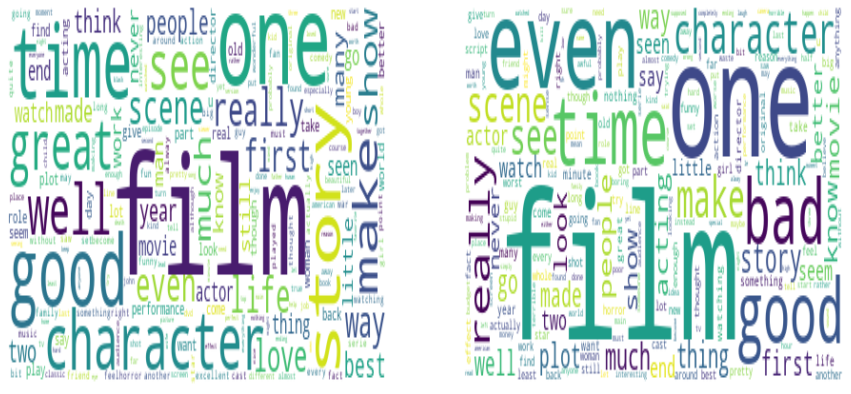

In [11]:
figure = plt.figure(figsize=[15, 7])
plt.subplot(1, 2, 1)
plt.imshow(positive_word_cloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(negative_words_cloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

---
<a name = Section7></a>
# **7. Data Post-processing**
---

<a name = Section71></a>
### **7.1 Text Vectorizing - TFIDF**

- In this section, we will convert our collection of documents to a vectorized form.

- This vectorized form of data will then be split and injected for model development.

In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['review'])
y = data['sentiment']
print(X.shape)

(49582, 92428)


<a name = Section72></a>
### **7.2 Data Splitting**

- Let's split our data to train and test set for model injection.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (39665, 92428) (39665,)
Testing Data Shape: (9917, 92428) (9917,)


---
<a name = Section8></a>
# **8. Model Development & Evaluation**
---

- Now we will create different models (Logistic Regression and Multinomial Naive Bayes) to train and evaluate the performance of them.

<a name = Section81></a>
### **8.1 Logistic Regression**

In [14]:
lr = LogisticRegression(class_weight='balanced', random_state=42, solver='lbfgs', max_iter=1000, n_jobs=-1)
lr.fit(X_train, y_train)

y_train_pred_count = lr.predict(X_train)
y_test_pred_count = lr.predict(X_test)

print('                    Training Report          ')
print(classification_report(y_train, y_train_pred_count))

print('                    Testing Report           ')
print(classification_report(y_test, y_test_pred_count))

                    Training Report          
              precision    recall  f1-score   support

    negative       0.94      0.92      0.93     19758
    positive       0.93      0.94      0.93     19907

    accuracy                           0.93     39665
   macro avg       0.93      0.93      0.93     39665
weighted avg       0.93      0.93      0.93     39665

                    Testing Report           
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4940
    positive       0.88      0.91      0.90      4977

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



<a name = Section82></a>
### **8.2 Multinomial Naive Bayes**

In [15]:
mn = MultinomialNB()
mn.fit(X_train, y_train)

y_train_pred_count = mn.predict(X_train)
y_test_pred_count = mn.predict(X_test)

print('                    Training Report          ')
print(classification_report(y_train, y_train_pred_count))

print('                    Testing Report           ')
print(classification_report(y_test, y_test_pred_count))

                    Training Report          
              precision    recall  f1-score   support

    negative       0.90      0.92      0.91     19758
    positive       0.91      0.90      0.91     19907

    accuracy                           0.91     39665
   macro avg       0.91      0.91      0.91     39665
weighted avg       0.91      0.91      0.91     39665

                    Testing Report           
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      4940
    positive       0.88      0.86      0.87      4977

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



**Observation:**

- We can observe that **Logistic Regression performed better than Multinomial Naive Bayes** in terms of accuracy, precision, and recall.

<a name = Section83></a>
### **8.3 New Predictions**

<a name = Section831></a>
#### **8.3.1 New Predictions - Using Text**

In [16]:
review = \
    """
    The Last Duel:
    In this woke world, where mindfulness is the buzzword and consent is stressed on always, comes this tale narrated by Ridley Scott, known for his prowess in the historical genre. This film deals with a world where women were asked to keep quiet and had no voice. Seen as the property of the men in their household, it is unthinkable that they would speak up against sexual violence. The story, replete with violence especially in the climax, shows a tale of a woman's voice against rape much ahead of a world where women could say #MeToo.
    The film begins dramatically with the climax, where we see Le Gris and Carrouge all set for a duel in front of the French aristocracy to figure out if the latter's wife Marguerite is right in her accusation. The bizarre way in which they seek divine answers through a duel between the accused, who is fighting to prove his innocence, and the husband, who is fighting for his wife's honour, with little space for the woman's voice to be heard is rather uncomfortable for us living today's world, albeit it is equally hard now as well.
    The film is told in the Rashomon style, where we have three different perspectives to what led to the actual incident involving the duel. After all, history is not based on one viewpoint alone and this adaptation of the true incident tries to give the female perspective to film and full props to writers Matt Damon, Ben Afflect and Nicole Holofcener for trying to give it a well balanced view. Does this work? To a large extent, as it brings forth the important question of consent. There are instances that this is shown, where Le Gris does state that Marguerite did have customary protests, but she is only women. He is then advised to just deny it happened, as people will not understand the grey area. Similarly, Marguerite's friend thinks she could be wrong as she once thought Le Gris is handsome.
    The most disturbing yet impactful scene is the trial, in front of the king, ahead of the duel. Marguerite is bombarded by a series of uncomfortable questions, by a group of only men, where they did not leave the question of whether she enjoyed sex with her husband or if that satisfied her. The stoic sadness with which she answers this leaves you hurt. Albeit, trials by the media are the same today too, which is another debate altogether. When Marguerite's mother-in-law confesses that she was raped too, and women should be quiet, it leaves one wondering about the world that the women lived in back then.
    The Last Duel might have its jagged ends and might not be as grand or bombastic as Scott's earlier films, but it certainly puts forth pertinent questions that need to be discussed today. This historical drama has excessive violence and some gore too, but in the heart is about a woman unknowingly becoming the flagbearer for a new movement for people speaking against sexual assault. The cast delivers on demand and Jodie Comer steals the show with a measured performance that is applause worthy.
    """

In [17]:
# Transforming raw data to clean data
review = [clean_data(review)]

# Vectorizing the input data
new_input = vectorizer.transform(review)

# Predicting label for the input movie
prediction_label = lr.predict(new_input)
print('Label:', prediction_label)

Label: ['positive']


<a name = Section832></a>
#### **8.3.2 New Predictions - Using Audio**

In [23]:
engine = pyttsx3.init()
engine.setProperty('rate', 120)
voice = engine.getProperty('voices')

print("Using Male voice:", repr(voice))
engine.setProperty('voice', voice[0].id)
engine.say("Please give your thoughts for any movie...")
engine.runAndWait()

Using Male voice: [<pyttsx3.voice.Voice object at 0x0000017E5EAD03A0>, <pyttsx3.voice.Voice object at 0x0000017E5E316E80>]


In [26]:
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 30
WAVE_OUTPUT_FILENAME = "file.wav"
audio = pyaudio.PyAudio()
r = sr.Recognizer()

# Recording starts from here...
stream = audio.open(format=FORMAT, channels=CHANNELS,rate=RATE, input=True,frames_per_buffer=CHUNK)
print("Recording started...")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print("Recording finished...")
stream.stop_stream()
stream.close()
audio.terminate()

# Recording ends and saving the file...
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

Recording started...
Recording finished...


In [27]:
# Reading the audio file and converting it to text
harvard = sr.AudioFile('file.wav')

with harvard as source:
    audio = r.record(source)
text = r.recognize_google(audio)
print(text)
engine = pyttsx3.init()
engine.say(text)
engine.runAndWait() 

# Transforming raw data to clean data
review = [clean_data(text)]

# Vectorizing the input data
new_input = vectorizer.transform(review)

# Predicting label for the input movie
prediction_label = lr.predict(new_input)
print('Label:', prediction_label)

Kumar smashing Andreas belvedere insert some whistles and cheering as one can't ignore the fact that it to Paparazzi he is slim fit an Agile and sports a top arm and personality Bell bottom who is playing husband to Vani Kapoor is a national level chess player has a sharp memory and is fluent in
Label: ['positive']


<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**


- We analyzed and understood the behavior of the data and performed manipulations accordingly.

- We performed several transformations over the movies reviews as per the requirement.

- We tried out Logistic Regression and Multinomial Naive Bayes algorithm for training the model.

- It turns out that the Logistic Regression gave us the best accuracy on test data i.e. around 89%.


<a name = Section92></a>
### **9.2 Actionable Insights**

- The company should try selling movies that the majority of customers found entertaining.

- The model will help the company in understanding the sentiment of individual customers.

- The company should also focus on getting more reviews about the movies purchased.

- This will not only help them to improve their situation but also act as a catalyst for future sales.